<a href="https://colab.research.google.com/github/rawoolsiddhi/deep_learning/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall -y tensorflow tensorflow-gpu keras tensorboard tensorflow-estimator


Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Successfully uninstalled tensorflow-2.15.0
Found existing installation: keras 2.15.0
Uninstalling keras-2.15.0:
  Successfully uninstalled keras-2.15.0
Found existing installation: tensorboard 2.15.2
Uninstalling tensorboard-2.15.2:
  Successfully uninstalled tensorboard-2.15.2
Found existing installation: tensorflow-estimator 2.15.0
Uninstalling tensorflow-estimator-2.15.0:
  Successfully uninstalled tensorflow-estimator-2.15.0


In [ ]:
!pip install tensorflow-gpu==2.10.0 keras==2.10.0 tensorboard==2.10.1 tensorflow-estimator==2.10.0 protobuf==3.19.6



In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


TensorFlow version: 2.10.0
Num GPUs Available:  0


In [ ]:
# import some liberaries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv("Churn_Modelling.csv")

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# whether person gonna exit the bank or not

In [ ]:
# divide the featur into independent feature and dependent feature

X = dataset.iloc[:, 3:13]
y=dataset.iloc[:,13]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
# feature engineering

Geography=pd.get_dummies(X['Geography'],drop_first=True)
# drop_first-True----it will go with two col here


In [ ]:
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [ ]:
# cancat above variables with dataaset

In [ ]:
X = X.drop(['Geography','Gender'] ,axis=1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
X = pd.concat([X,Geography,gender], axis=1)

In [ ]:
# splitting the dataset into tran and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
# feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
# ANN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,LeakyReLU
from tensorflow.keras.layers import Dropout

In [ ]:
# initilize ANN

classifier = Sequential()

In [ ]:
# add the input layers

classifier.add(Dense(units=8,activation='relu'))

In [ ]:
# add first hidden layer
classifier.add(Dense(units=5,activation='relu'))
classifier.add(Dropout(0.3))

In [ ]:
# add third hidden layer
classifier.add(Dense(units=3,activation='relu'))

In [ ]:
# add output layer
classifier.add(Dense(1,activation ='sigmoid'))

In [ ]:
# by defualt learning rate--
# to have customized one---the

import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
# training neural net


classifier.compile(optimizer= opt ,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True
)

In [ ]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=[early_stopping])


Epoch 1/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4655 - accuracy: 0.7962 - val_loss: 0.4420 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4234 - accuracy: 0.8041 - val_loss: 0.4078 - val_accuracy: 0.8262
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3972 - accuracy: 0.8393 - val_loss: 0.3824 - val_accuracy: 0.8463
Epoch 4/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3829 - accuracy: 0.8494 - val_loss: 0.3823 - val_accuracy: 0.8417
Epoch 5/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3792 - accuracy: 0.8489 - val_loss: 0.3754 - val_accuracy: 0.8448
Epoch 6/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3793 - accuracy: 0.8498 - val_loss: 0.3865 - val_accuracy: 0.8550
Epoch 7/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3784 - accuracy: 0.8477 - val_loss: 0.3703 - val_accuracy:

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

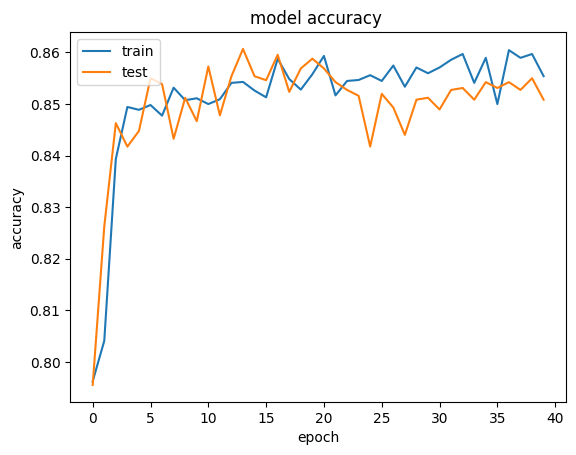

In [ ]:
# accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy ')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')
plt.show()

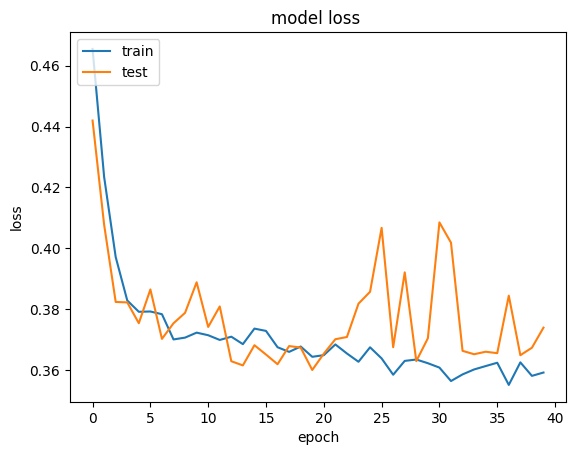

In [ ]:
# loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss ')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')
plt.show()

In [ ]:
# test data-prep and evalute

y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)


63/63 [==============================] - 0s 1ms/step


In [ ]:
# confusion matrix

from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
cm

array([[1486,  109],
       [ 175,  230]])

In [ ]:
# calculate the accuracy

from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)



In [ ]:
score

0.858

In [ ]:
# get weights

classifier.get_weights()

[array([[-2.24836186e-01,  4.15870219e-01, -5.97636849e-02,
          3.42941642e-01, -1.58374965e-01,  4.64197755e-01,
          1.63345877e-02,  1.36593318e+00],
        [ 1.21546423e+00,  8.56059611e-01, -2.66778970e+00,
         -2.57676125e+00, -5.40060401e-01, -1.62630069e+00,
         -1.08941257e-01,  2.48206377e-01],
        [ 4.19277012e-01, -6.53233886e-01,  1.68168902e-01,
          6.80823028e-02, -1.36913598e-01, -2.17762783e-01,
          1.12071365e-01,  4.62937921e-01],
        [-7.67497540e-01,  1.26448750e+00, -2.15591848e-01,
          7.19138682e-01,  1.03363074e-01, -4.39622760e-01,
         -2.05112267e+00, -1.57839286e+00],
        [-2.20591530e-01,  1.14533901e+00,  2.84939796e-01,
          4.47570473e-01,  2.76128244e+00,  9.11586344e-01,
         -2.36489177e+00,  5.27882874e-01],
        [ 2.01316282e-01, -3.36489320e-01, -3.93128544e-01,
         -1.55972973e-01,  1.24021165e-01,  7.76930213e-01,
         -5.63359223e-02, -2.54149109e-01],
        [ 2.6484